# Part1a

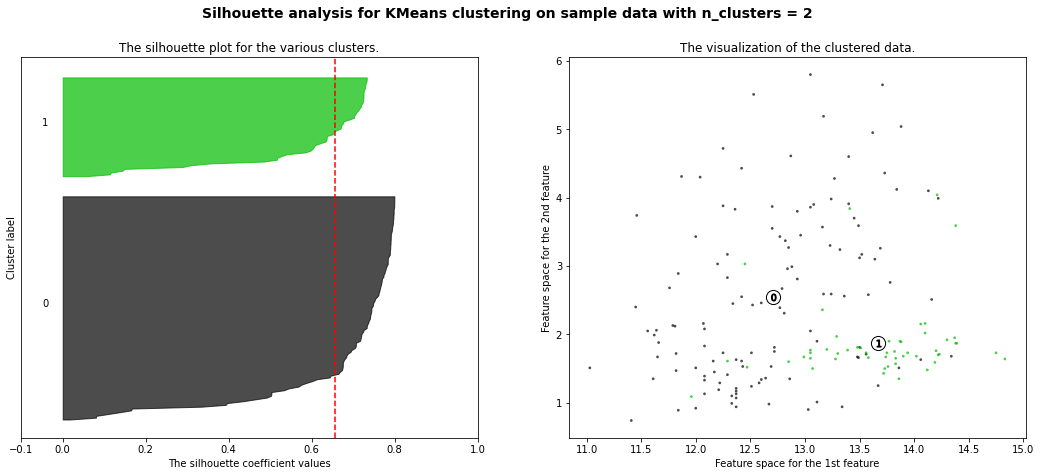

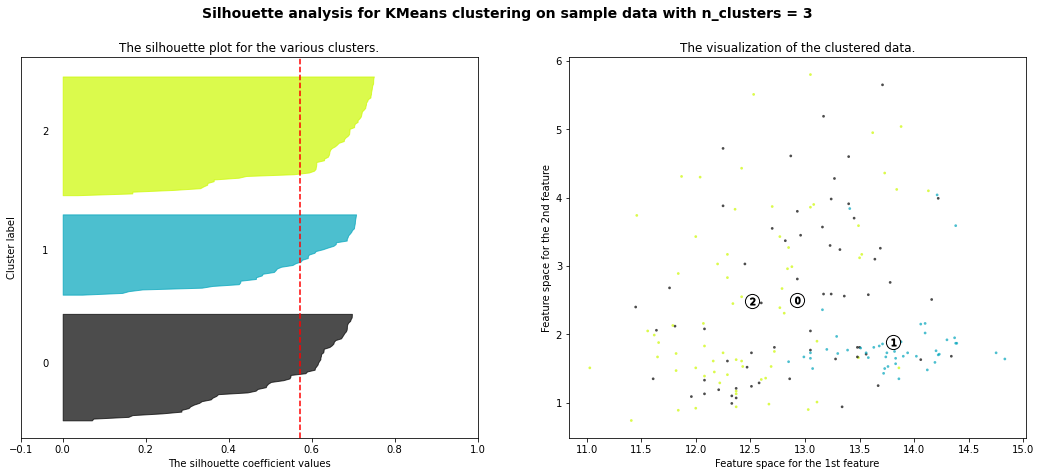

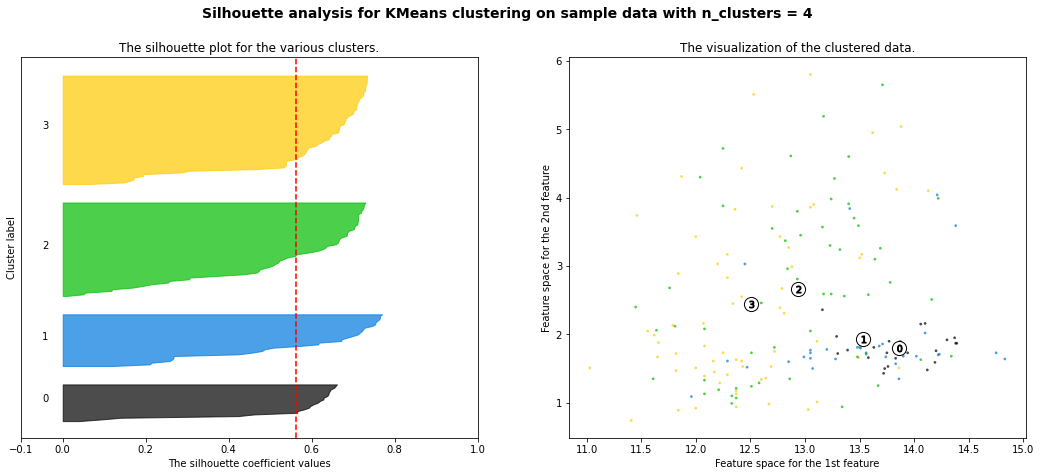

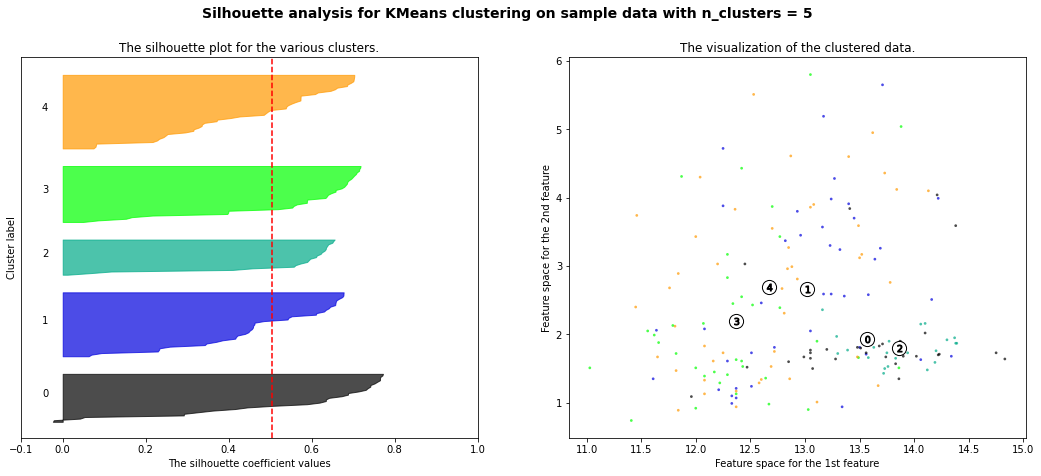

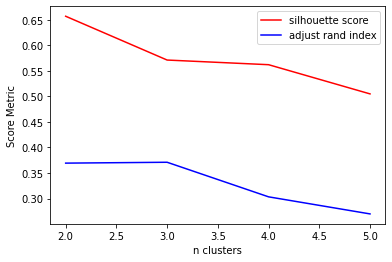

For n_clusters = 2 The average silhouette_score is : 0.6568536504294319
For n_clusters = 3 The average silhouette_score is : 0.5711381937868844
For n_clusters = 4 The average silhouette_score is : 0.5620323449580352
For n_clusters = 5 The average silhouette_score is : 0.5048919134103689


For n_clusters = 2 The adjusted random score is : 0.3694075388574537
For n_clusters = 3 The adjusted random score is : 0.37111371823084754
For n_clusters = 4 The adjusted random score is : 0.30344253157834694
For n_clusters = 5 The adjusted random score is : 0.2700201125643007


In [5]:
import numpy as np
import pandas as pd 
from sklearn import datasets

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.metrics.cluster import adjusted_rand_score

(X, y) = datasets.load_wine(return_X_y=True)

k_min = 2
k_max = 6
clrs = ['red', 'green', 'blue', 'yellow', 'purple']
silhouette_avgs = []
adjusted_rand = []
for k in range(k_min, k_max):
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (k + 1) * 10])
    
    km = KMeans(
        n_clusters=k, init='random',
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
    )

    y_km = km.fit_predict(X)

    # computing sillouette avg score
    silhouette_avg = silhouette_score(X, y_km)
    silhouette_avgs.append(silhouette_avg)

    adjusted_rand.append(adjusted_rand_score(y, y_km))

     # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, y_km)

    y_lower = 10
    for i in range(0, k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[y_km == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(y_km.astype(float) / k)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = km.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % k),
                 fontsize=14, fontweight='bold')


    plt.show()

plt.clf()
plt.plot(range(k_min, k_max), silhouette_avgs, c='red', label='silhouette score')
plt.plot(range(k_min, k_max), adjusted_rand, c='blue', label='adjust rand index')
plt.legend()
plt.xlabel('n clusters')
plt.ylabel('Score Metric')
plt.show()

for k in range(0, k_max - k_min):
    print("For n_clusters =", k + k_min,
        "The average silhouette_score is :", silhouette_avgs[k])

print("\n")
for k in range(0, k_max - k_min):
    print("For n_clusters =", k + k_min,
        "The adjusted random score is :", adjusted_rand[k])

# Part1b

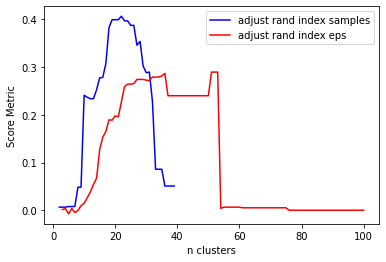

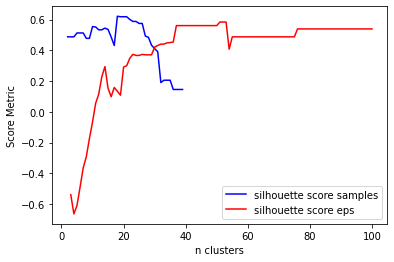


Min Samples Results ###
Silhouette Score: 0.6219346011105124 Suggested Param: 18
Adjusted Rand Score: 0.40665375935014153 Suggested Param: 22

EPS Results ###
Silhouette Score: 0.5842311574667655 Suggested Param: 51
Adjusted Rand Score: 0.2897315539672838 Suggested Param: 51


In [9]:
import numpy as np
import pandas as pd 
from sklearn import datasets

import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.metrics.cluster import adjusted_rand_score

from sklearn.cluster import DBSCAN

(X, y) = datasets.load_wine(return_X_y=True)

eps_min = 3
eps_max = 101
samples_min = 2
samples_max = 40
clrs = ['red', 'green', 'blue', 'yellow', 'purple']

eps_silhouette_avgs = []
eps_adjusted_rand = []
samples_silhouette_avgs = []
samples_adjusted_rand = []

for k in range(eps_min, eps_max):
    
    db = DBSCAN(eps=k, min_samples=2)
    labels = db.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    eps_silhouette_avgs.append(silhouette_avg)

    eps_adjusted_rand.append(adjusted_rand_score(y, labels))

for k in range(samples_min, samples_max):
    
    db = DBSCAN(eps=60, min_samples=k)
    labels = db.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    samples_silhouette_avgs.append(silhouette_avg)

    samples_adjusted_rand.append(adjusted_rand_score(y, labels))

plt.clf()
plt.plot(range(samples_min, samples_max), samples_adjusted_rand, c='blue', label='adjust rand index samples')
plt.plot(range(eps_min, eps_max), eps_adjusted_rand, c='red', label='adjust rand index eps')
plt.legend()
plt.xlabel('n clusters')
plt.ylabel('Score Metric')
plt.show()

plt.clf()
plt.plot(range(samples_min, samples_max), samples_silhouette_avgs, c='blue', label='silhouette score samples')
plt.plot(range(eps_min, eps_max), eps_silhouette_avgs, c='red', label='silhouette score eps')
plt.legend()
plt.xlabel('n clusters')
plt.ylabel('Score Metric')
plt.show()

best_sample_silhouette_score = max(samples_silhouette_avgs)
best_samples_adjust_rand_score = max(samples_adjusted_rand)
best_eps_silhouette_score = max(eps_silhouette_avgs)
best_eps_adjust_rand_score = max(eps_adjusted_rand)

best_sample_silhouette = samples_silhouette_avgs.index(best_sample_silhouette_score) + samples_min
best_samples_adjust_rand = samples_adjusted_rand.index(best_samples_adjust_rand_score) + samples_min
best_eps_silhouette = eps_silhouette_avgs.index(best_eps_silhouette_score) + eps_min
best_eps_adjust_rand = eps_adjusted_rand.index(best_eps_adjust_rand_score) + eps_min


print("\nMin Samples Results ###")
print("Silhouette Score: " + str(best_sample_silhouette_score) + " Suggested Param: " + str(best_sample_silhouette))
print("Adjusted Rand Score: " + str(best_samples_adjust_rand_score) + " Suggested Param: " + str(best_samples_adjust_rand))

print("\nEPS Results ###")
print("Silhouette Score: " + str(best_eps_silhouette_score) + " Suggested Param: " + str(best_eps_silhouette))
print("Adjusted Rand Score: " + str(best_eps_adjust_rand_score) + " Suggested Param: " + str(best_eps_adjust_rand))

# Part1c